<a href="https://colab.research.google.com/github/VenkateshDas/legal_text_retrieval_coliee/blob/master/basic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading preprocessed data

In [ ]:
import os
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /preprocessed_data/')
import pandas as pd
df_query_list = pd.read_pickle('cleaned_ground_truth.pkl')
df_expanded_query_list = pd.read_pickle("cleaned_extended_ground_truth.pkl")
# df_query_list.head
df_civil_code_list = pd.read_pickle('cleaned_civil_code.pkl')
# df_civil_code_list.head
dataset_query_tokens = df_expanded_query_list['Query_tokens']
dataset_query_lemmas = df_query_list['Query_lemma']

dataset_expanded_query_tokens = df_expanded_query_list['Expanded_query_tokens']
dataset_expanded_query_lemmas = df_expanded_query_list['Expanded_query_lemma']

dataset_article_tokens = df_civil_code_list['Article_description_tokens']
dataset_article_lemmas = df_civil_code_list['Article_description_lemmas']
import re
def change_hyphen(article_number):
  return re.sub('_','-',article_number)
def remmove_space(article_number):
  return re.sub(' ','',article_number)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(change_hyphen)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(remmove_space)

In [ ]:
dataset_expanded_query_bi_tri_grams = df_expanded_query_list['Expanded_query_bi_tri_grams']
dataset_combined_articles_lemma_bi_tri_grams = df_civil_code_list['Combined_lemma_Bi_tri']

In [ ]:
df_civil_code_list['Article_bi_tri_grams']

1      [fundamental_principle, principle_article_1, a...
2      [standard_construction, construction_article_2...
3      [article_3, 3_1, 1_enjoyment, enjoyment_privat...
4      [article_3, 3_2, 2_person, person_make, make_j...
5      [age_majority, majority_article_4, article_4_a...
                             ...                        
772    [fetus_capacity, capacity_hold, hold_right, ri...
773    [method_compensation, compensation_loss, loss_...
774    [recovery_defamation, defamation_article_723, ...
775    [extinctive_prescription, prescription_claim, ...
776    [extinctive_prescription, prescription_claim, ...
Name: Article_bi_tri_grams, Length: 776, dtype: object

In [ ]:
df_expanded_query_list

,ID,Query,Article_numbers,Query_tokens,Query_lemma,Query_pos,Expanded_query_tokens,Expanded_query_lemma,Query_bigrams,Query_trigrams,Query_bi_tri_grams,Expanded_query_bi_tri_grams,Articles,Article_tokens,Article_lemma,Article_pos,Article_titles,Article_title_tokens,Article_title_lemma,Article_title_pos,Article_bigrams,Article_trigrams
0,H21-1-1,Acceptance made by a minor that received an o...,[5],"[acceptance, made, minor, received, offer, gif...","[acceptance, make, minor, receive, offer, gift...","[NOUN, VERB, NOUN, VERB, NOUN, NOUN, ADP, NOUN...","[nipper, not, establish, rescinded, youngster,...","[nipper, not, establish, youngster, sire, tale...","[acceptance_make, make_minor, minor_receive, r...","[acceptance_make_minor, make_minor_receive, mi...","[acceptance_make, make_minor, minor_receive, r...","[nipper, not, establish, youngster, sire, tale...",\nArticle 5\n(1) A minor must obtain the conse...,"[['juridical', 'acts', 'minors', 'article_5', ...","[['juridical', 'act', 'minor', 'article_5', '1...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['juridical', 'acts', 'minors']]","[['juridical', 'act', 'minor']]","[['ADJ', 'NOUN', 'NOUN']]","[[juridical_act, act_minor, minor_article_5, a...","[[juridical_act_minor, act_minor_article_5, mi..."
1,H21-1-2,"If a minor, after getting permission for carr...",[6],"[minor, getting, permission, carrying, busines...","[minor, get, permission, carry, business, stat...","[ADJ, VERB, NOUN, VERB, NOUN, ADJ, NOUN, VERB,...","[nipper, not, bear, rescinded, youngster, smal...","[nipper, not, bear, youngster, small, sire, ki...","[minor_get, get_permission, permission_carry, ...","[minor_get_permission, get_permission_carry, p...","[minor_get, get_permission, permission_carry, ...","[nipper, not, bear, youngster, small, sire, ki...",\nArticle 6\n(1) A minor who is permitted to c...,"[['permission', 'minors', 'conduct', 'business...","[['permission', 'minor', 'conduct', 'business'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['permission', 'minors', 'conduct', 'business']]","[['permission', 'minor', 'conduct', 'business']]","[['NOUN', 'NOUN', 'VERB', 'NOUN']]","[[permission_minor, minor_conduct, conduct_bus...","[[permission_minor_conduct, minor_conduct_busi..."
2,H21-1-3,The purchase of daily household items may not...,[9],"[purchase, daily, household, items, may, not, ...","[purchase, daily, household, item, may, not, r...","[NOUN, ADJ, NOUN, NOUN, VERB, ADV, VERB, ADV, ...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[purchase_daily, daily_household, household_it...","[purchase_daily_household, daily_household_ite...","[purchase_daily, daily_household, household_it...","[Mrs._Humphrey_Ward, not, day_by_day, househol...",\nArticle 9\nA juridical act performed by an a...,"[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN']]","[[juridical_act, act_adult, adult_ward, ward_g...","[[juridical_act_adult, act_adult_ward, adult_w..."
3,H21-1-4,"If a person under curatorship performs, witho...","[13, 120, 122]","[person, curatorship, performs, without, getti...","[person, curatorship, perform, without, get, c...","[NOUN, NOUN, NOUN, ADP, VERB, NOUN, NOUN, VERB...","[not, sire, turn, consent, pay_back, deed, aim...","[not, sire, turn, consent, pay_back, deed, aim...","[person_curatorship, curatorship_perform, perf...","[person_curatorship_perform, curatorship_perfo...","[person_curatorship, curatorship_perform, perf...","[not, sire, turn, consent, pay_back, deed, aim...",\nArticle 13\n(1) A person under curatorship m...,

In [ ]:
df_civil_code_list

,Article_number,Referenced_article_num,Article_description,Article_titles,Article_description_tokens,Article_description_lemmas,Article_description_pos,Article_desc_bigrams,Article_desc_trigrams,Article_bi_tri_grams,Combined_lemma_Bi_tri,Article_title_tokens,Article_title_lemma,Article_title_pos
1,1,{},(Fundamental Principles) Article_1 (1) Privat...,(Fundamental Principles),"[fundamental, principles, article_1, 1, privat...","[fundamental, principle, article_1, 1, private...","[ADJ, NOUN, NOUN, NUM, ADJ, NOUN, VERB, ADJ, A...","[fundamental_principle, principle_article_1, a...","[fundamental_principle_article_1, principle_ar...","[fundamental_principle, principle_article_1, a...","[fundamental, principle, article_1, 1, private...","[fundamental, principles]","[fundamental, principle]","[ADJ, NOUN]"
2,2,{},(Standards for Construction) Article_2 This C...,(Standards for Construction),"[standards, construction, article_2, code, mus...","[standard, construction, article_2, code, must...","[NOUN, NOUN, ADP, NOUN, VERB, VERB, VERB, NOUN...","[standard_construction, construction_article_2...","[standard_construction_article_2, construction...","[standard_construction, construction_article_2...","[standard, construction, article_2, code, must...","[standards, construction]","[standard, construction]","[NOUN, NOUN]"
3,3,{},Article 3 (1) The enjoyment of private rights...,(Standards for Construction),"[article, 3, 1, enjoyment, private, rights, co...","[article, 3, 1, enjoyment, private, right, com...","[NOUN, NUM, PUNCT, NOUN, ADJ, NOUN, NOUN, NOUN...","[article_3, 3_1, 1_enjoyment, enjoyment_privat...","[article_3_1, 3_1_enjoyment, 1_enjoyment_priva...","[article_3, 3_1, 1_enjoyment, enjoyment_privat...","[article, 3, 1, enjoyment, private, right, com...","[standards, construction]","[standard, construction]","[NOUN, NOUN]"
4,3-2,{},Article 3-2 If the person making a juridical ...,(Standards for Construction),"[article, 3, 2, person, making, juridical, act...","[article, 3, 2, person, make, juridical, act, ...","[NOUN, NUM, NUM, NOUN, VERB, ADJ, NOUN, ADV, A...","[article_3, 3_2, 2_person, person_make, make_j...","[article_3_2, 3_2_person, 2_person_make, perso...","[article_3, 3_2, 2_person, person_make, make_j...","[article, 3, 2, person, make, juridical, act, ...","[standards, construction]","[standard, construction]","[NOUN, NOUN]"
5,4,{},(Age of Majority) Article_4 The age of majori...,(Age of Majority),"[age, majority, article_4, age, majority, 20, ...","[age, majority, article_4, age, majority, 20, ...","[NOUN, NOUN, NOUN, NOUN, NOUN, NUM, NOUN, NOUN]","[age_majority, majority_article_4, article_4_a...","[age_majority_article_4, majority_article_4_ag...","[age_majority, majority_article_4, article_4_a...","[age, majority, article_4, age, majority, 20, ...","[age, majority]","[age, majority]","[NOUN, NOUN]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,721,{},(Fetus' Capacity to Hold Rights Regarding Clai...,(Fetus' Capacity to Hold Rights Regarding Clai...,"[fetus, capacity, hold, rights, regarding, cla...","[fetus, capacity, hold, right, regard, claim, ...","[X, NOUN, VERB, NOUN, VERB, NOUN, NOUN, NOUN, ...","[fetus_capacity, capacity_hold, hold_right, ri...","[fetus_capacity_hold, capacity_hold_right, hol...","[fetus_capacity, capacity_hold, hold_right, ri...","[fetus, capacity, hold, right, regard, claim, ...","[fetus, capacity, hold, rights, regarding, cla...","[fetus, capacity, hold, right, regard, claim, ...","[X, NOUN, VERB, NOUN, VERB, NOUN, NOUN, NOUN, ..."
773,722,{},"(Method of Compensation for Loss or Damage, De...","(Method of Compensation for Loss or Damage, De...","[method, compensation, loss, damage, deduction...","[method, compensation, loss, damage, deduction...","[NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, NOUN, ADJ,...","[method_compensation, compensation_loss, loss_...","[method_compensation_loss, compensation_loss_d...","[method_compensation, compensation_loss, loss_...","[method, compensation, l

In [ ]:
# df_query_list
df_expanded_query_list

,ID,Query,Article_numbers,Query_tokens,Query_lemma,Query_pos,Expanded_query_tokens,Expanded_query_lemma,Query_bigrams,Query_trigrams,Query_bi_tri_grams,Expanded_query_bi_tri_grams,Articles,Article_tokens,Article_lemma,Article_pos,Article_titles,Article_title_tokens,Article_title_lemma,Article_title_pos,Article_bigrams,Article_trigrams
0,H21-1-1,Acceptance made by a minor that received an o...,[5],"[acceptance, made, minor, received, offer, gif...","[acceptance, make, minor, receive, offer, gift...","[NOUN, VERB, NOUN, VERB, NOUN, NOUN, ADP, NOUN...","[nipper, not, establish, rescinded, youngster,...","[nipper, not, establish, youngster, sire, tale...","[acceptance_make, make_minor, minor_receive, r...","[acceptance_make_minor, make_minor_receive, mi...","[acceptance_make, make_minor, minor_receive, r...","[nipper, not, establish, youngster, sire, tale...",\nArticle 5\n(1) A minor must obtain the conse...,"[['juridical', 'acts', 'minors', 'article_5', ...","[['juridical', 'act', 'minor', 'article_5', '1...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['juridical', 'acts', 'minors']]","[['juridical', 'act', 'minor']]","[['ADJ', 'NOUN', 'NOUN']]","[[juridical_act, act_minor, minor_article_5, a...","[[juridical_act_minor, act_minor_article_5, mi..."
1,H21-1-2,"If a minor, after getting permission for carr...",[6],"[minor, getting, permission, carrying, busines...","[minor, get, permission, carry, business, stat...","[ADJ, VERB, NOUN, VERB, NOUN, ADJ, NOUN, VERB,...","[nipper, not, bear, rescinded, youngster, smal...","[nipper, not, bear, youngster, small, sire, ki...","[minor_get, get_permission, permission_carry, ...","[minor_get_permission, get_permission_carry, p...","[minor_get, get_permission, permission_carry, ...","[nipper, not, bear, youngster, small, sire, ki...",\nArticle 6\n(1) A minor who is permitted to c...,"[['permission', 'minors', 'conduct', 'business...","[['permission', 'minor', 'conduct', 'business'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['permission', 'minors', 'conduct', 'business']]","[['permission', 'minor', 'conduct', 'business']]","[['NOUN', 'NOUN', 'VERB', 'NOUN']]","[[permission_minor, minor_conduct, conduct_bus...","[[permission_minor_conduct, minor_conduct_busi..."
2,H21-1-3,The purchase of daily household items may not...,[9],"[purchase, daily, household, items, may, not, ...","[purchase, daily, household, item, may, not, r...","[NOUN, ADJ, NOUN, NOUN, VERB, ADV, VERB, ADV, ...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[purchase_daily, daily_household, household_it...","[purchase_daily_household, daily_household_ite...","[purchase_daily, daily_household, household_it...","[Mrs._Humphrey_Ward, not, day_by_day, househol...",\nArticle 9\nA juridical act performed by an a...,"[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN']]","[[juridical_act, act_adult, adult_ward, ward_g...","[[juridical_act_adult, act_adult_ward, adult_w..."
3,H21-1-4,"If a person under curatorship performs, witho...","[13, 120, 122]","[person, curatorship, performs, without, getti...","[person, curatorship, perform, without, get, c...","[NOUN, NOUN, NOUN, ADP, VERB, NOUN, NOUN, VERB...","[not, sire, turn, consent, pay_back, deed, aim...","[not, sire, turn, consent, pay_back, deed, aim...","[person_curatorship, curatorship_perform, perf...","[person_curatorship_perform, curatorship_perfo...","[person_curatorship, curatorship_perform, perf...","[not, sire, turn, consent, pay_back, deed, aim...",\nArticle 13\n(1) A person under curatorship m...,

# Create article and query dataset

In [ ]:
#article corpus
dataset_article_lemmas.iloc[0]
import ast
lemma_articles = []
for i in range(len(df_civil_code_list)):
  line = []
  #line = ast.literal_eval(dataset_article_tokens.iloc[i])
  line = df_civil_code_list['Article_bi_tri_grams'].iloc[i]
  lemma_articles.append(line)
token_articles = []
for i in range(len(df_civil_code_list)):
  line = []
  #line = ast.literal_eval(dataset_article_tokens.iloc[i])
  line = df_civil_code_list['Article_description_tokens'].iloc[i]
  token_articles.append(line)

In [ ]:
lemma_articles[0]

In [ ]:
#query corpus and ground truth
query_list = []
for line in range(len(dataset_expanded_query_lemmas)):
  q = []
  #q = ast.literal_eval(dataset_expanded_query_lemmas.iloc[line])
  q = df_expanded_query_list['Expanded_query_bi_tri_grams'].iloc[line]
  query_list.append(q)
ground_truth = []
for line in range(len(df_query_list)):
  l=[]
  #l=ast.literal_eval(df_query_list['Article_numbers'].iloc[line])
  l=(df_expanded_query_list['Article_numbers'].iloc[line])
  ground_truth.append(l)


In [ ]:
sum = 0
for i in range(len(ground_truth)):
  sum += len(ground_truth[i])
  print(sum)

1
2
3
6
8
10
11
12
13
14
15
16
17
18
19
20
22
23
26
27
28
29
30
31
32
33
34
35
37
38
39
40
41
42
43
44
45
47
48
49
50
51
52
53
55
56
57
58
59
63
65
66
67
68
69
70
71
73
75
76
77
78
79
81
82
83
86
88
89
90
91
92
93
94
95
97
99
100
101
102
103
104
105
107
109
110
111
112
114
115
117
118
120
121
122
123
124
125
126
128
129
130
131
132
133
134
135
136
137
139
140
141
142
143
145
146
148
150
151
152
154
155
156
157
158
159
162
166
167
168
170
171
173
174
175
176
177
179
180
181
182
183
184
186
187
188
189
190
191
194
197
198
201
203
205
206
208
210
212
214
215
217
220
221
222
224
228
229
231
232
233
234
236
237
239
240
241
242
243
246
247
248
250
251
252
253
254
255
256
258
260
262
263
264
265
266
267
269
270
271
272
274
275
276
277
278
280
282
283
284
286
287
288
289
290
291
292
294
296
297
298
299
300
301
302
303
304
305
306
308
309
310
311
312
313
314
315
317
318
320
321
322
324
325
326
327
329
330
333
334
335
337
338
340
341
342
343
345
346
347
348
349
350
352
353
354
355
357
358
359
36

In [ ]:
dataset_query_lemmas.iloc[0]

"['acceptance', 'make', 'minor', 'receive', 'offer', 'gift', 'without', 'burden', 'without', 'get', 'consent', 'statutory', 'agent', 'may', 'not', 'rescind']"

In [ ]:
#query relevence file
qrel_list = []
for i in range(len(df_expanded_query_list)):
  id = df_query_list['ID'].iloc[i]
  for j in range(len(ground_truth[i])):
    qrel_list.append(id+" "+"0"+" "+ground_truth[i][j]+" "+"1")
f= open("q_rel.txt","w+")
for i in range(len(qrel_list)):
  f.write(qrel_list[i]+"\n")
f.close() 
    

In [ ]:
for i in range(len(qrel_list)):
  print(qrel_list[i])

H21-1-1 0 5 1
H21-1-2 0 6 1
H21-1-3 0 9 1
H21-1-4 0 13 1
H21-1-4 0 120 1
H21-1-4 0 122 1
H21-1-5 0 7 1
H21-1-5 0 11 1
H21-3-1 0 189 1
H21-3-1 0 190 1
H21-3-2 0 575 1
H21-3-4 0 356 1
H21-3-5 0 89 1
H21-5-3 0 707 1
H21-5-4 0 119 1
H21-7-5 0 206 1
H21-8-A 0 181 1
H21-8-O 0 201 1
H21-9-1 0 184 1
H21-9-2 0 182 1
H21-9-3 0 181 1
H21-9-3 0 658 1
H21-9-4 0 183 1
H21-10-1 0 223 1
H21-10-1 0 224 1
H21-10-1 0 229 1
H21-10-2 0 234 1
H21-10-3 0 209 1
H21-10-5 0 213 1
H21-12-1 0 295 1
H21-12-2 0 295 1
H21-12-3 0 297 1
H21-13-A 0 313 1
H21-13-I 0 304 1
H21-13-U 0 343 1
H21-13-E 0 344 1
H21-13-E 0 345 1
H21-13-O 0 349 1
H21-15-3 0 388 1
H21-19-A 0 447 1
H21-19-I 0 453 1
H21-19-U 0 457 1
H21-19-E 0 459 1
H21-20-2 0 467 1
H21-20-4 0 468 1
H21-21-1 0 478 1
H21-21-1 0 479 1
H21-21-3 0 487 1
H21-21-4 0 481 1
H21-21-5 0 485 1
H21-22-5 0 508 1
H21-24-A 0 550 1
H21-24-I 0 643 1
H21-24-E 0 176 1
H21-24-E 0 177 1
H21-24-O 0 446 1
H21-25-3 0 702 1
H21-25-4 0 474 1
H21-25-5 0 462 1
H21-26-A 0 541 1
H21-26-A 0 542

In [ ]:
#len(query_list)
len(ground_truth[1])
int(ground_truth[1][0])
#for i
amounts = [0,0,0,0,0,0,0]
for i in range(len(ground_truth)):
  amounts[len(ground_truth[i])]+=1
print(amounts)

[0, 538, 121, 27, 6, 2, 1]


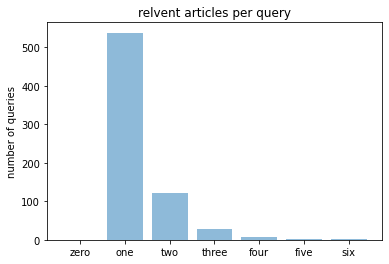

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
relevent_articles = ('zero','one','two','three','four','five','six')
y_pos = np.arange(len(relevent_articles))
plt.bar(y_pos, amounts, align='center', alpha=0.5)
plt.xticks(y_pos, relevent_articles)
plt.ylabel('number of queries')
plt.title('relvent articles per query')

plt.show()

# Gensim parameters

In [ ]:
dataset_combined_articles_lemma_bi_tri_grams

1      [fundamental, principle, article_1, 1, private...
2      [standard, construction, article_2, code, must...
3      [article, 3, 1, enjoyment, private, right, com...
4      [article, 3, 2, person, make, juridical, act, ...
5      [age, majority, article_4, age, majority, 20, ...
                             ...                        
772    [fetus, capacity, hold, right, regard, claim, ...
773    [method, compensation, loss, damage, deduction...
774    [recovery, defamation, article_723, court, may...
775    [extinctive, prescription, claim, compensation...
776    [extinctive, prescription, claim, compensation...
Name: Combined_lemma_Bi_tri, Length: 776, dtype: object

In [ ]:
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('punkt')
import pprint
from gensim import models
from gensim import similarities
#create dictionary
dictionary_articles = corpora.Dictionary(dataset_combined_articles_lemma_bi_tri_grams)
#create corpus
corpus_articles = [dictionary_articles.doc2bow(line) for line in dataset_combined_articles_lemma_bi_tri_grams]
#create model
tfidf_model = models.TfidfModel(corpus_articles, smartirs='ntc')
corpus_tfidf_model = tfidf_model[corpus_articles]
#index
index_tfidf_model = similarities.SparseMatrixSimilarity(corpus_tfidf_model, num_features=len(dictionary_articles))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pprint
print(dictionary_articles.token2id)
for i in range (5):
  print(corpus_articles[i])

{'1': 0, '2': 1, '3': 2, 'abuse': 3, 'article_1': 4, 'congruent': 5, 'done': 6, 'duties': 7, 'exercise': 8, 'faith': 9, 'fundamental': 10, 'good': 11, 'must': 12, 'not': 13, 'performance': 14, 'permitted': 15, 'principles': 16, 'private': 17, 'public': 18, 'rights': 19, 'welfare': 20, '  ': 21, 'article_2': 22, 'code': 23, 'construction': 24, 'construed': 25, 'dignity': 26, 'equality': 27, 'essential': 28, 'honor': 29, 'individuals': 30, 'sexes': 31, 'standards': 32, 'applicable': 33, 'article': 34, 'birth': 35, 'commences': 36, 'enjoy': 37, 'enjoyment': 38, 'foreign': 39, 'laws': 40, 'nationals': 41, 'otherwise': 42, 'prohibited': 43, 'regulations': 44, 'treaties': 45, 'unless': 46, 'act': 47, 'capacity': 48, 'intention': 49, 'juridical': 50, 'making': 51, 'manifesting': 52, 'mental': 53, 'person': 54, 'relevant': 55, 'void': 56, '20': 57, 'age': 58, 'article_4': 59, 'majority': 60, 'years': 61, "'s": 62, 'acquiring': 63, 'acts': 64, 'applies': 65, 'apply': 66, 'article_5': 67, 'conse

# Tf-IDF Retreival Process

In [ ]:
def retrieve_using_tfidf(index, query_list, top_n,threshold,top_100 = False):
    """
    This function searches the most similar texts to the query.
        :param index: gensim.similarities object
        :param query: a string
        :param top_n: how many variants it returns
        :param prints: if True returns the results, otherwise prints the results
        :returns: a list of tuples (matched_document_index, similarity_value)
    """
    total = 0
    tp = 0
    result = []
    for i in range(len(query_list)):
      query_id = df_expanded_query_list['ID'].iloc[i]
      #for test
      #query_id = df_test_data['ID'].iloc[i] 
      query_bow_vec = dictionary_articles.doc2bow(query_list[i])
      similarities = index[query_bow_vec]  # get similarities between the query and all index documents
      similarities = [(x, i) for i, x in enumerate(similarities)]
      similarities.sort(key=lambda elem: -elem[0])  # sorting by similarity_value in decreasing order
      rank = 1
      for score,doc_number in similarities[:top_n]:
        retrieved_article_number = df_civil_code_list['Article_number'].iloc[doc_number]
        if top_100==True:
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")## top 100
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")# top 100
          rank+=1
        #if df_civil_code_list['Article_number'].iloc[doc_number]
        else:
          if rank == 1:
            #print(query_id, "Q0", retrieved_article_number, rank, score, "OvGU", sep=" ") 
            result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
            rank+=1
            total+=1
            if retrieved_article_number in ground_truth[i]:
              tp +=1
          
          elif score > threshold:
            #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", sep=" ") 
            result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
            rank+=1
            total+=1
            if retrieved_article_number in ground_truth[i]:
              tp +=1

        
      
          
        
    return total,tp,result  #for evaluation 
    
    #return result #for test
    

In [ ]:
dataset_query_lemmas.iloc[0]

"['special', 'provision', 'release', 'warranty', 'make', 'situation', 'right', 'seller', 'establish', 'third', 'party', 'seller', 'not', 'release', 'warranty']"

# Evaluation

In [ ]:
def evaluation(true_positive,total_relevent,total_retrieved):
  print("total retrieved = "+str(total_retrieved)+ "\ntp= "+str(true_positive)+"\ntotal relevent=" +str(total_relevent))
  false_positive = total_retrieved - true_positive
  false_negative = total_relevent - true_positive
  precision  = true_positive / (true_positive+false_positive)
  recall = true_positive / (true_positive + false_negative)
  f_score = (5* precision * recall) / ((4*precision )+ recall)
  print("Precion = "+str(precision),"Recall="+str(recall), "F2score = "+str(f_score), sep="\n")

In [ ]:
total_retrieved=0
total_relevent = 0
for i in range(len(ground_truth)):
  total_relevent += len(ground_truth[i])
#i in range(len(query_list)):
total_retrieved, true_positive, result = retrieve_using_tfidf(index_tfidf_model,query_list,2,0.10)
evaluation(true_positive,total_relevent,total_retrieved)

f= open("result_tfidf_combined_lemmas_bi_tri_gram.txt","w+")
for i in range(len(result)):
  f.write(result[i]+"\n")
f.close()


total retrieved = 1214
tp= 410
total relevent=901
Precion = 0.33772652388797364
Recall=0.4550499445061043
F2score = 0.42548775425487756


In [ ]:
len(ground_truth)
"""
total retrieved = 1156 tp= 403 total relevent=903 Precion = 0.3486159169550173 Recall=0.44629014396456257 F2score = 0.4226090604026846 
q= 2, th = .33 lemmas
tokens q= 2, th = .33
total retrieved = 1067 tp= 351 total relevent=901 Precion = 0.3289597000937207 Recall=0.3895671476137625 F2score = 0.37572254335260
total retrieved = 1156 tp= 385 total relevent=901 Precion = 0.33304498269896193 Recall=0.42730299667036625 F2score = 0.4044117647058823
q= 2, th = .33 lemmas new
total retrieved = 1378 tp= 403 total relevent=901 Precion = 0.29245283018867924 Recall=0.44728079911209767 F2score = 0.4044560417503011
q= 2, th = .14 query expansion lemmas 
total retrieved = 1028 tp= 359 total relevent=901 Precion = 0.34922178988326846 Recall=0.39844617092119866 F2score = 0.38752158894645944
q= 3, th = .21 bigrams
total retrieved = 1026 tp= 297 total relevent=901 Precion = 0.2894736842105263 Recall=0.32963374028856823 F2score = 0.32073434125269973
q= 3, th = .13 trigrams
"""

695

# BM25

In [ ]:
!pip install rank_bm25
from rank_bm25 import BM25Okapi


In [ ]:
def retrieve_using_BM25(query_list,preprocessed_corpus, top_n, score_difference_threshold,top_100= True):
  
  bm25 = BM25Okapi(preprocessed_corpus)
  doc_list=[]
  for i in range(len(preprocessed_corpus)):
    doc_list.append(i)
  total = 0
  tp = 0
  result = []
  top_score = 0
  for i in range(len(query_list)):
    # query_id = df_query_list['ID'].iloc[i]
    query_id = df_test_data['ID'].iloc[i]
    rank = 1
    doc_scores = bm25.get_scores(query_list[i])
    bm25_dict = dict(zip(doc_list,doc_scores))
    sorted_bm25_dict = sorted(bm25_dict.items(), key=lambda x: x[1], reverse=True)
    for doc_number, score in sorted_bm25_dict[:top_n]:
      retrieved_article_number = df_civil_code_list['Article_number'].iloc[doc_number]
      if top_100 == True :
          print(query_id, "Q0", retrieved_article_number, rank, score, "OvGU",sep=" ")## top 100
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")# top 100
          rank+=1
      else:
        if rank ==1:
          top_score = score
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", ground_truth[i], sep=" ")
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")#for test
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
          rank+=1
          total+=1
          if retrieved_article_number in ground_truth[i]:
            tp +=1
        elif top_score - score < score_difference_threshold: 
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", ground_truth[i], sep=" ")
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")#for test
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
          rank+=1
          total+=1
          if retrieved_article_number in ground_truth[i]:
            tp +=1
          
#   return tp,total
   
  #for test
  return result  

  


In [ ]:
print(696*2)
"""total retrieved = 1481 tp= 433 total relevent=903 Precion = 0.2923700202565834 Recall=0.4795127353266888 F2score = 0.42509326526605146
r = 3, th = 7 lemmas old
total retrieved = 1279 tp= 418 total relevent=901 Precion = 0.326817826426896 Recall=0.46392896781354054 F2score = 0.4280155642023346
r = 3, th = 6 tokens
total retrieved = 1362 tp= 456 total relevent=901 Precion = 0.33480176211453744 Recall=0.5061043285238623 F2score = 0.4591220298026581 
r = 3, th = 7 lemmas new
total retrieved = 1683 tp= 427 total relevent=901 Precion = 0.25371360665478315 Recall=0.4739178690344062 F2score = 0.4038206922640439
r = 3, th = 11 query expansion lemma
total retrieved = 1102
tp= 374 total relevent=901 Precion = 0.3393829401088929 Recall=0.41509433962264153 F2score = 0.39736506587335324
r = 2, th = 7 bigrams 
total retrieved = 1091 tp= 287 total relevent=901 Precion = 0.26306141154903756 Recall=0.31853496115427304 F2score = 0.30564430244941426
r = 2. th = 5
"""

1392


In [ ]:
true_positive_bm25, total_retrieved_bm25 = retrieve_using_BM25(query_list,dataset_combined_articles_lemma_bi_tri_grams,2,45)
evaluation(true_positive_bm25,total_relevent,total_retrieved_bm25)


total retrieved = 1235
tp= 421
total relevent=901
Precion = 0.3408906882591093
Recall=0.4672586015538291
F2score = 0.43500723289935933


setting a threshold value is difficult. This has to be decided based on the experimentation on which provides a better F2 score since that is used as the basic evaluation metric. 

ref for evaluation : http://pages.cs.wisc.edu/~jerryzhu/cs838/IR.pdf

# test data

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /preprocessed_data/test_data/')
df_test_data = pd.read_pickle('cleaned_formal_test_data.pkl')


In [ ]:
test_data_query_list_comb = []
for i in range(len(df_test_data)):
  q = df_test_data['Expanded_query_bi_tri_grams'].iloc[i]
  test_data_query_list_comb.append(q)

In [ ]:
test_data_query_list_1 = []
for i in range(len(df_test_data)):
  q = df_test_data['Query_lemma'].iloc[i]
  test_data_query_list_1.append(q)
test_data_query_list_2 = []
for i in range(len(df_test_data)):
  q=df_test_data['Query_tokens'].iloc[i]
  test_data_query_list_2.append(q)
test_data_query_list_3 = []


In [ ]:
test_data_query_list_2[0]

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /Results/')
result = retrieve_using_BM25(test_data_query_list_comb,dataset_combined_articles_lemma_bi_tri_grams,100,45,True)
print(result)
f= open("result_1_combined_lemma_bi_tri_bm25_100.txt","w+")
for i in range(len(result)):
  f.write(result[i]+"\n")
f.close()

In [ ]:
result_2 = retrieve_using_BM25(test_data_query_list_2,token_articles,3,6,top_100=False)
print(result_2)
f= open("result_2_token_bm25.txt","w+")
for i in range(len(result_2)):
  f.write(result_2[i]+"\n")
f.close()

In [ ]:
result_3 = retrieve_using_tfidf(index_tfidf_model,test_data_query_list_1,2,0.33,top_100=False)
print(result_3)
f= open("result_3_lemma_tfidf.txt","w+")
for i in range(len(result_3)):
  f.write(result_3[i]+"\n")
f.close()

In [ ]:
result_1 = retrieve_using_BM25(test_data_query_list_1,lemma_articles,100,7,top_100=True)
print(result_1)
f= open("result_1_lemma_bm25_top_100.txt","w+")
for i in range(len(result_1)):
  f.write(result_1[i]+"\n")
f.close()

In [ ]:
result_2 = retrieve_using_BM25(test_data_query_list_2,token_articles,100,7,top_100=True)
print(result_2)
f= open("result_2_token_bm25_top_100.txt","w+")
for i in range(len(result_2)):
  f.write(result_2[i]+"\n")
f.close()

In [ ]:
result_3 = retrieve_using_tfidf(index_tfidf_model,test_data_query_list_1,100,0.33,top_100=True)
print(result_3)
f= open("result_3_lemma_tfidf_top_100.txt","w+")
for i in range(len(result_3)):
  f.write(result_3[i]+"\n")
f.close()